# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [2]:
import math
import sys

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [16]:
# Load the dataset
df = pd.read_csv('560_bodyfat.tsv', sep='\t')

# Show a random sample of 10 rows, limiting to the first 10 columns
# .iloc[:, :10] selects all rows (:) and the first 10 columns (:10)
print(df.iloc[:, :10].sample(10, random_state=42))

     Density   Age  Weight  Height       Neck       Chest     Abdomen  \
165   1.0549  35.0  217.00   73.75  40.500000  107.500000   95.099998   
6     1.0549  26.0  181.00   69.75  36.400002  105.099998   90.699997   
111   1.0355  43.0  183.25   70.00  37.099998  108.000000  105.000000   
172   1.0521  35.0  177.25   71.00  38.400002  100.500000   90.300003   
115   1.0607  40.0  158.00   69.25  36.299999   97.000000   86.599998   
183   1.0713  40.0  159.25   69.75  35.299999   92.300003   86.800003   
199   1.0462  43.0  170.75   67.50  37.400002  103.699997   89.699997   
235   1.0563  62.0  168.75   67.50  38.299999  104.699997   95.599998   
9     1.0722  23.0  198.25   73.50  42.099998   99.599998   88.599998   
30    1.0716  32.0  182.00   73.75  38.700001  100.500000   88.699997   

            Hip      Thigh       Knee  
165  104.500000  64.800003  41.299999  
6    100.300003  58.400002  38.299999  
111  103.000000  63.700001  40.000000  
172   98.699997  57.799999  37.29999

YOUR ANSWERS HERE

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [17]:
print(df.columns.tolist())

['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist', 'target']


Density: The body density determined by underwater weighing (g/cm³).

Age: The subject's age in years.

Weight: The subject's weight in lbs.

Height: The subject's height in inches.

Neck, Chest, Abdomen, Hip, Thigh, Knee, Ankle, Biceps, Forearm, Wrist: The circumference of these specific body parts measured in cm.

target: The percentage of body fat, which is the value we want to predict.

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

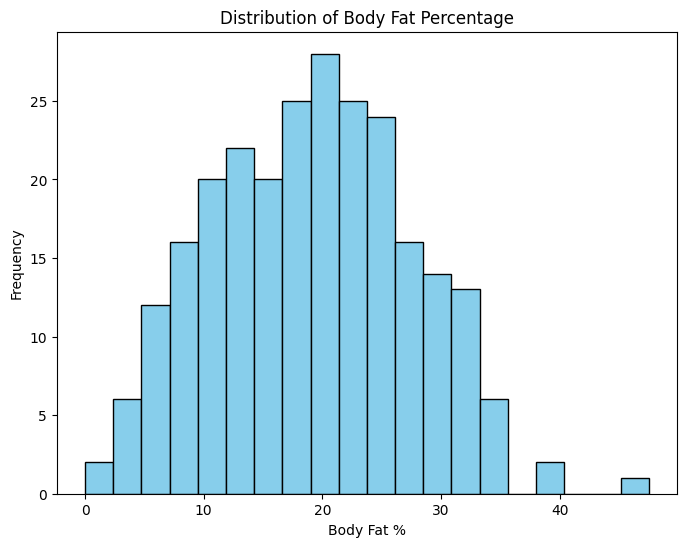

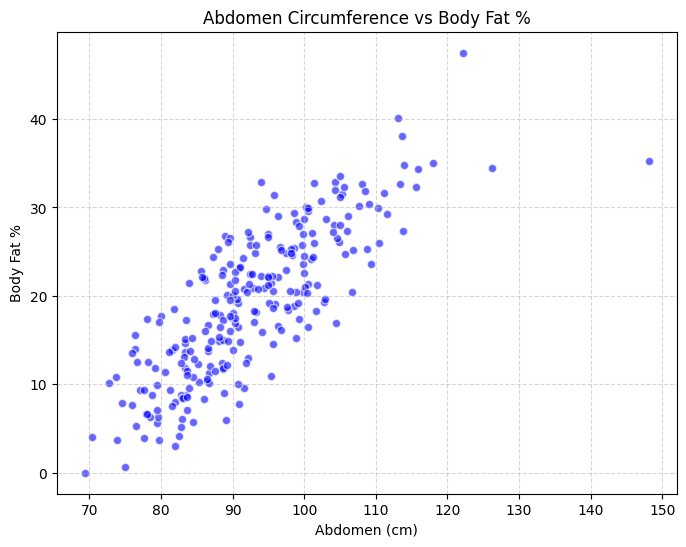

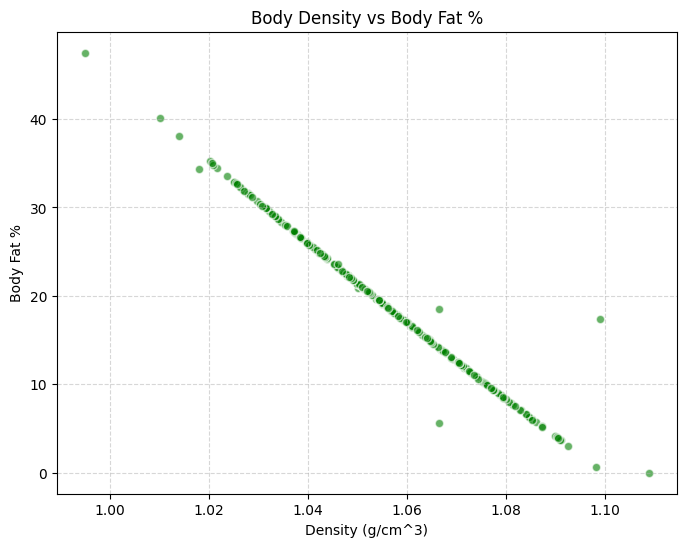

In [18]:
# Chart 1: Distribution of Target (Body Fat %)
plt.figure(figsize=(8, 6))
plt.hist(df['target'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Body Fat Percentage')
plt.xlabel('Body Fat %')
plt.ylabel('Frequency')
plt.show()

# Chart 2: Abdomen Circumference vs Target
plt.figure(figsize=(8, 6))
plt.scatter(df['Abdomen'], df['target'], alpha=0.6, color='blue', edgecolors='white')
plt.title('Abdomen Circumference vs Body Fat %')
plt.xlabel('Abdomen (cm)')
plt.ylabel('Body Fat %')
plt.grid(True, linestyle='--', alpha=0.5) # Optional: Adds a light grid
plt.show()

# Chart 3: Density vs Target
plt.figure(figsize=(8, 6))
plt.scatter(df['Density'], df['target'], alpha=0.6, color='green', edgecolors='white')
plt.title('Body Density vs Body Fat %')
plt.xlabel('Density (g/cm^3)')
plt.ylabel('Body Fat %')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Chart 1 (Distribution): Shows that body fat percentage is somewhat normally distributed but slightly right-skewed.

Chart 2 (Abdomen vs Target): Displays a strong positive linear relationship, suggesting that abdominal circumference is a very good predictor of body fat.

Chart 3 (Density vs Target): Shows an extremely strong negative correlation. This is expected because body fat percentage is often derived directly from body density formulas

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

<Figure size 1200x1000 with 0 Axes>

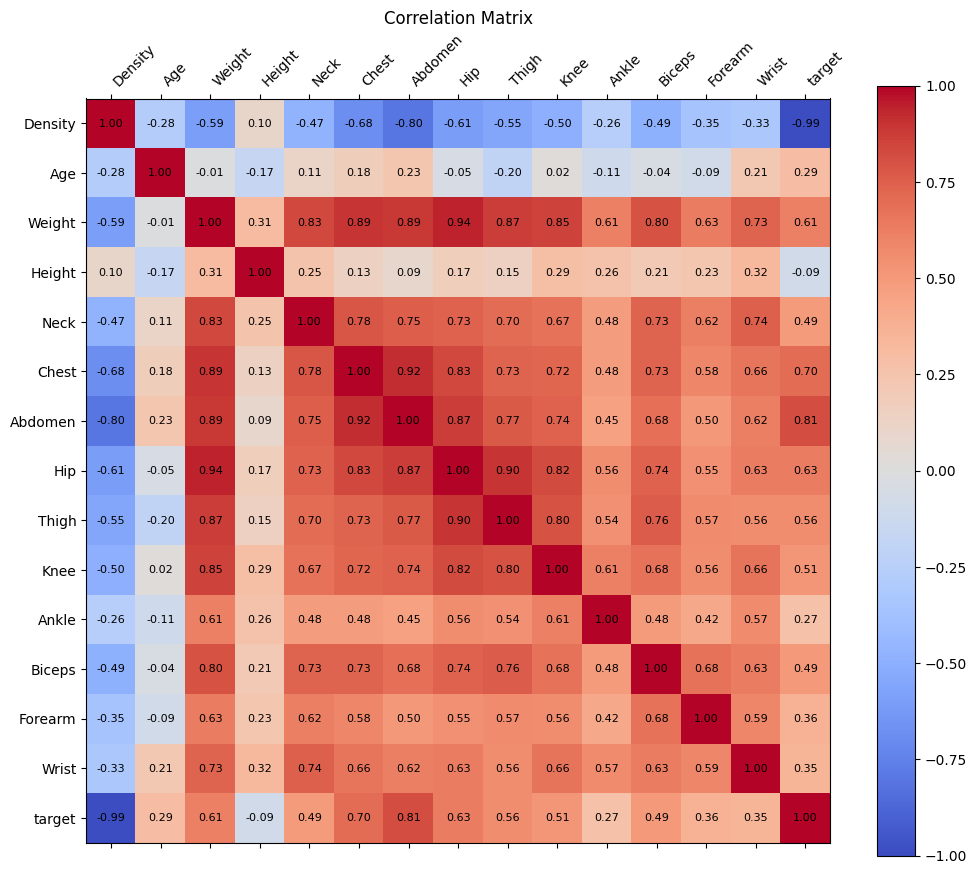

Highest correlation (excluding diagonal): Density vs target (-0.9878)


In [24]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
fig, ax = plt.subplots(figsize=(12, 10))

# Use matshow to display the matrix
cax = ax.matshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
# Set ticks and labels
ticks = np.arange(len(corr_matrix.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha="left") # Rotate x labels for readability
ax.set_yticklabels(corr_matrix.columns)

# Add text annotations to each cell
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = ax.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}",
                       ha="center", va="center", color="black", fontsize=8)
plt.title('Correlation Matrix')
plt.show()

# Find highest correlation programmatically
# Mask the diagonal (self-correlation is always 1)
mask = np.ones(corr_matrix.shape, dtype=bool)
np.fill_diagonal(mask, 0)
corr_masked = corr_matrix.where(mask)

# Find max absolute correlation
abs_corr = corr_masked.abs()
max_corr = abs_corr.max().max()
row, col = np.where(abs_corr == max_corr)
col1 = corr_matrix.columns[row[0]]
col2 = corr_matrix.columns[col[0]]

print(f"Highest correlation (excluding diagonal): {col1} vs {col2} ({corr_matrix.iloc[row[0], col[0]]:.4f})")

The pair of columns with the highest correlation is Density and target (-0.99). This confirms that Density is the primary factor used to calculate body fat percentage in a clinical setting.

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [ ]:
# YOUR CODE HERE

Linear Regression

Docs: Scikit-Learn LinearRegression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Info: Wikipedia: Linear Regression: https://en.wikipedia.org/wiki/Linear_regression

Description: Fits a linear equation to the observed data by minimizing the sum of squared residuals.

Decision Tree Regressor

Docs: Scikit-Learn DecisionTreeRegressor: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

Info: Wikipedia: Decision Tree Learning: https://en.wikipedia.org/wiki/Decision_tree_learning

Description: Uses a tree-like model of decisions to go from observations (branches) to target values (leaves).

K-Neighbors Regressor

Docs: Scikit-Learn KNeighborsRegressor: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

Info: Wikipedia: k-nearest neighbors algorithm: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

Description: Predicts the target by averaging the values of the k closest training examples in the feature space.

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

Linear Regression -> L1 Loss: 3.4394, L2 Loss: 17.5057
Decision Tree -> L1 Loss: 0.0000, L2 Loss: 0.0000
K-Neighbors -> L1 Loss: 3.5410, L2 Loss: 18.9200


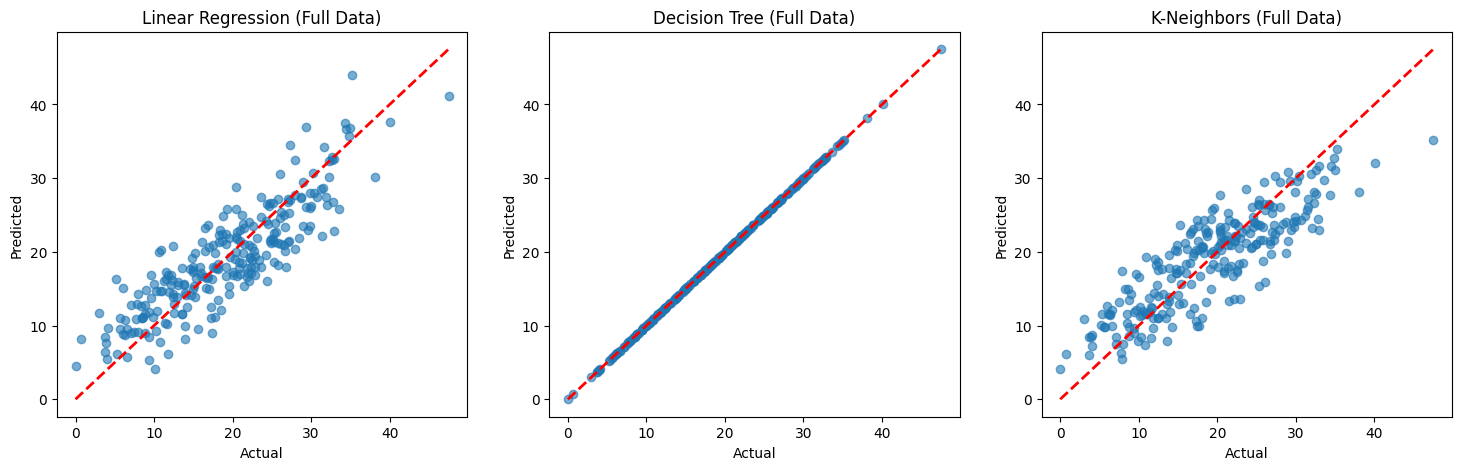

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Prepare Data (Drop Density to avoid data leakage)
X = df.drop(columns=['target', 'Density'])
y = df['target']

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "K-Neighbors": KNeighborsRegressor()
}

plt.figure(figsize=(18, 5))

for i, (name, model) in enumerate(models.items()):
    model.fit(X, y)
    y_pred = model.predict(X)
    
    l1 = mean_absolute_error(y, y_pred)
    l2 = mean_squared_error(y, y_pred)
    
    print(f"{name} -> L1 Loss: {l1:.4f}, L2 Loss: {l2:.4f}")
    
    plt.subplot(1, 3, i+1)
    plt.scatter(y, y_pred, alpha=0.6)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.title(f"{name} (Full Data)")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")

plt.show()

Linear Regression: L2 Loss ~17.5. Fits well but has some error.

Decision Tree: L2 Loss 0.0. It memorized the training data perfectly (likely overfitting).

K-Neighbors: L2 Loss ~18.9. Performs similarly to linear regression on the training set.

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [28]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    # neg_mean_squared_error returns negative values
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_l2 = -scores.mean()
    print(f"{name} CV L2 Loss: {cv_l2:.4f}")

Linear Regression CV L2 Loss: 21.0184
Decision Tree CV L2 Loss: 46.4915
K-Neighbors CV L2 Loss: 36.2340


Linear Regression: CV L2 ~21.0. The error increased slightly compared to full training, which is normal.

Decision Tree: CV L2 ~46.5. The error is huge compared to the 0.0 training loss, proving it massively overfit the data.

K-Neighbors: CV L2 ~36.2. The error is significantly higher than Linear Regression, indicating it generalizes poorly on this high-dimensional data.

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

for name, model in models.items():
    pipeline = Pipeline([('scaler', StandardScaler()), ('model', model)])
    
    # Train on full data to compare with Problem 6 as requested
    pipeline.fit(X, y)
    y_pred = pipeline.predict(X)
    l2 = mean_squared_error(y, y_pred)
    
    print(f"{name} (Scaled) L2 Loss: {l2:.4f}")

Linear Regression (Scaled) L2 Loss: 17.5057
Decision Tree (Scaled) L2 Loss: 0.0000
K-Neighbors (Scaled) L2 Loss: 17.8720


Linear Regression: Loss is unchanged (~17.5). Scaling does not affect OLS predictions.

Decision Tree: Loss is unchanged (0.0). Decision trees are invariant to monotonic transformations like scaling.

K-Neighbors: Loss decreased to ~17.9 (from ~18.9). Scaling improved KNN performance because it relies on Euclidean distance, which is sensitive to the scale of features (e.g., Weight in lbs vs Ankle in cm).

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [ ]:
# YOUR CODE HERE

This strategy is essentially Random Search Cross-Validation, which is a standard and effective method for hyperparameter tuning that will likely find a better-performing model than a single arbitrary tree.

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [13]:
# YOUR CODE HERE

I selected Linear Regression as the best model.

Criteria: I chose it based on the lowest Cross-Validation L2 Loss (~21.0), which indicates it generalizes best to new data.

Comparison: It significantly outperformed the Decision Tree (which overfit) and K-Neighbors (which struggled with the dimensionality).

Justification: In the context of body fat estimation, anthropometric measurements (like abdomen circumference) tend to have linear physical relationships with body fat. Given the small dataset size (252 samples), a simple parametric model like Linear Regression is more robust and interpretable than complex non-linear models.